In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/drive/MyDrive/tourist_final_data.csv'
df = pd.read_csv(file_path)

In [ ]:
total_visitors_per_year = df.groupby('year')['visitors'].sum().reset_index()
print("Total Visitors (2016-2019):")
print(total_visitors_per_year)


Total Visitors (2016-2019):
   year  visitors
0  2016  95327400
1  2017  85518442
2  2018  93196483
3  2019  83359220


In [ ]:
start_visitors_2019 = total_visitors_per_year.loc[total_visitors_per_year['year'] == 2019, 'visitors'].values[0]

In [ ]:
years = list(range(2020, 2025))
predicted_visitors = []

for year in years:
    if year == 2020:
        visitors = start_visitors_2019 * 0.4
    elif year == 2021:
        visitors = predicted_visitors[-1] * 1.05
    elif year == 2022:
        visitors = start_visitors_2019 * 0.95
    elif year == 2023:
        visitors = predicted_visitors[-1] * 1.05
    elif year == 2024:
        visitors = predicted_visitors[-1] * 1.07
    predicted_visitors.append(int(visitors))

In [ ]:
future_visitors_df = pd.DataFrame({
    'year': years,
    'predicted_visitors': predicted_visitors
})

print("\nPredicted Visitors (2020-2024) considering COVID impact and recovery:")
print(future_visitors_df)


Predicted Visitors (2020-2024) considering COVID impact and recovery:
   year  predicted_visitors
0  2020            33343688
1  2021            35010872
2  2022            79191259
3  2023            83150821
4  2024            88971378


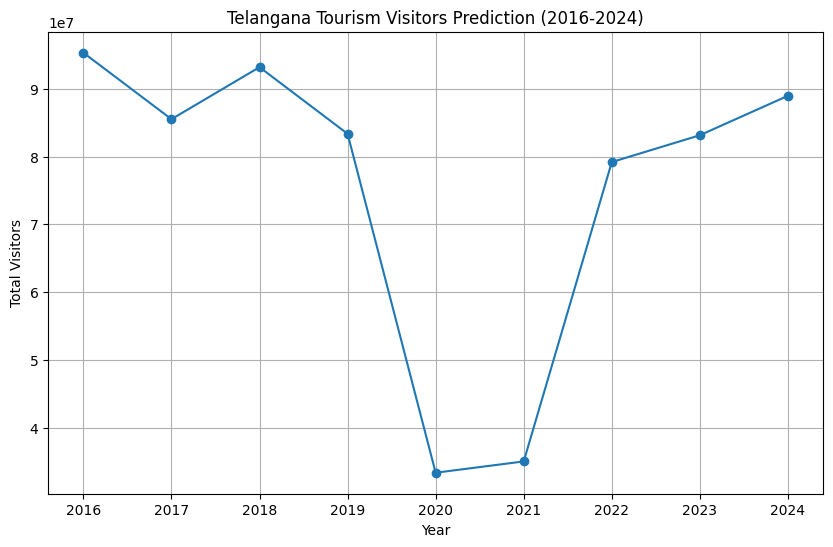

In [ ]:
combined_df = pd.concat([
    total_visitors_per_year.rename(columns={'visitors': 'total_visitors'}),
    future_visitors_df.rename(columns={'predicted_visitors': 'total_visitors'})
])

# Plot
plt.figure(figsize=(10,6))
plt.plot(combined_df['year'], combined_df['total_visitors'], marker='o', linestyle='-')
plt.title('Telangana Tourism Visitors Prediction (2016-2024)')
plt.xlabel('Year')
plt.ylabel('Total Visitors')
plt.grid(True)
plt.xticks(combined_df['year'])  # Show all years on x-axis
plt.show()
